# Выбор локации для скважины

Допустим, вы работаете в добывающей компании «ГлавРосГосНефть». Нужно решить, где бурить новую скважину.

Вам предоставлены пробы нефти в трёх регионах: в каждом 10 000 месторождений, где измерили качество нефти и объём её запасов. Постройте модель машинного обучения, которая поможет определить регион, где добыча принесёт наибольшую прибыль. Проанализируйте возможную прибыль и риски техникой *Bootstrap.*

Шаги для выбора локации:

- В избранном регионе ищут месторождения, для каждого определяют значения признаков;
- Строят модель и оценивают объём запасов;
- Выбирают месторождения с самым высокими оценками значений. Количество месторождений зависит от бюджета компании и стоимости разработки одной скважины;
- Прибыль равна суммарной прибыли отобранных месторождений.

In [1]:
#Установка доп библиотеки
!pip install skimp
!pip install phik

In [2]:
#Основные библиотеки
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as se
from skimpy import skim, clean_columns

#Изученные модели из курса для классификации
from sklearn.linear_model import LinearRegression

#Вспомогательные функции
from sklearn.model_selection import train_test_split
from sklearn.utils import shuffle
#from phik.report import correlation_report, plot_correlation_matrix

#Метрики
from sklearn.metrics import mean_squared_error

import warnings
warnings.filterwarnings("ignore")

In [3]:
#Настройка графиков
se.set_style('darkgrid')
#%config InlineBackend.figure_formats = 'png' # svg Не работает :(
se.set(rc={'font.size': 8, 
           'figure.facecolor': 'white',
           'figure.figsize': (10, 6),
           'axes.edgecolor': 'black',
           'axes.facecolor': 'white',
           'axes.grid': True,
           'grid.color': 'black',
           'grid.linewidth': 0.5,
           'grid.alpha': 0.3,
           'grid.linestyle': '--',
           'text.color': 'black',
           'xtick.color': 'black',
           'ytick.color': 'black',
           'font.size': 10.0,
           'xtick.bottom': True,
           'xtick.top': False,
           'ytick.left': True,
           'ytick.right': True,
           'lines.linewidth': 1, 
           'patch.edgecolor': 'w',
           'lines.solid_capstyle': 'butt',
           'patch.linewidth': 0.2})

## Загрузка и подготовка данных

In [4]:
try:
    data0 = pd.read_csv("/datasets/geo_data_0.csv")
    data1 = pd.read_csv("/datasets/geo_data_1.csv")
    data2 = pd.read_csv("/datasets/geo_data_2.csv")
except:
    data0 = pd.read_csv("C:\\Users\\Professional\\Desktop\\DataSet\\geo_data_0.csv")
    data1 = pd.read_csv("C:\\Users\\Professional\\Desktop\\DataSet\\geo_data_1.csv")
    data2 = pd.read_csv("C:\\Users\\Professional\\Desktop\\DataSet\\geo_data_2.csv")
finally:
    data0 = clean_columns(data0)
    data1 = clean_columns(data1)
    data2 = clean_columns(data2)

In [5]:
def phik_help(df):  
    
    # матрица корреляции признаков
    interval_cols = df.select_dtypes('number').columns.tolist()
    phik_overview = df.drop(columns='id').phik_matrix(interval_cols=interval_cols)
    
    plot_correlation_matrix(phik_overview.values, 
                        x_labels=phik_overview.columns, 
                        y_labels=phik_overview.index, 
                        color_map="Greens", 
                        title=r"correlation $\phi_K$", 
                        fontsize_factor=1)

    # статистическая значимость зависимостей
    significance_overview = df.drop(columns='id').significance_matrix(interval_cols=interval_cols)
    
    plot_correlation_matrix(significance_overview.fillna(0).values, 
                        x_labels=significance_overview.columns, 
                        y_labels=significance_overview.index, 
                        title="Significance of the coefficients", 
                        usetex=False, fontsize_factor=1)

    # глобальный коэффициент корреляции
    global_correlation, global_labels = df.drop(columns='id').global_phik(interval_cols=interval_cols)

    
    plot_correlation_matrix(global_correlation, 
                            x_labels=[''], y_labels=global_labels, 
                            color_map="Greens", title=r"$g_k$",
                            fontsize_factor=1)

In [6]:
skim(data0)

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

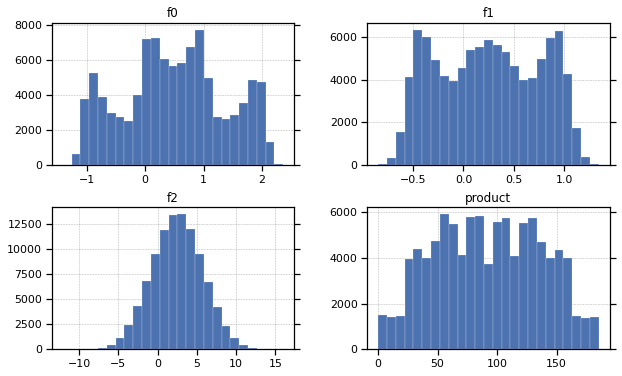

In [7]:
data0.hist(bins=25)

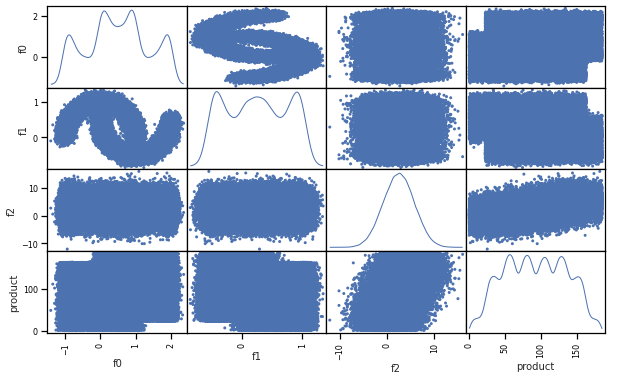

In [8]:
matrix = pd.plotting.scatter_matrix(data0, diagonal = "kde",  alpha = 1)
for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
    ax.grid(False)

In [9]:
#phik_help(data0)

Корреляция параметров между собой


<AxesSubplot:>

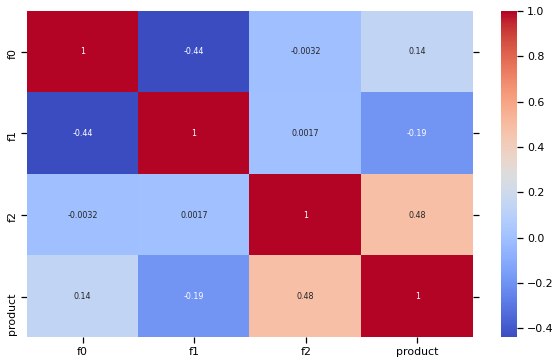

In [10]:
print("Корреляция параметров между собой")
se.heatmap(data0.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 8})

In [11]:
skim(data1)

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

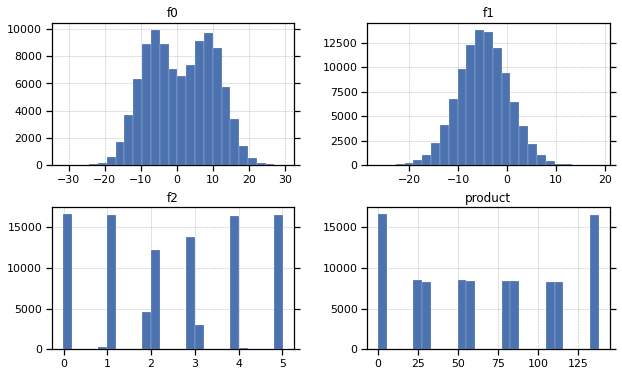

In [12]:
data1.hist(bins=25)

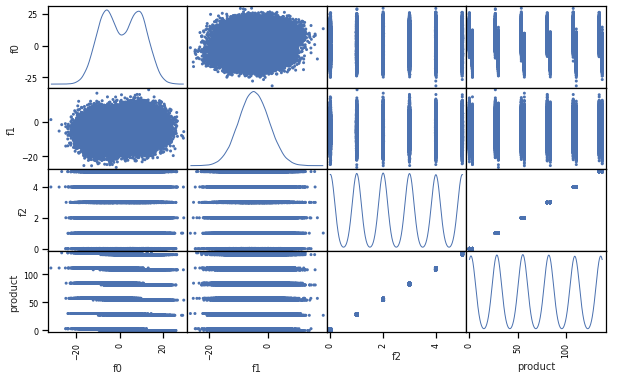

In [13]:
matrix = pd.plotting.scatter_matrix(data1, diagonal = "kde",  alpha = 1)
for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
    ax.grid(False)

In [14]:
#phik_help(data1)

Корреляция параметров между собой


<AxesSubplot:>

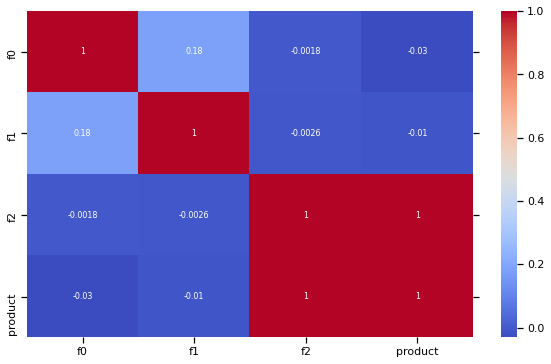

In [15]:
print("Корреляция параметров между собой")
se.heatmap(data1.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 8})

In [16]:
skim(data2)

array([[<AxesSubplot:title={'center':'f0'}>,
        <AxesSubplot:title={'center':'f1'}>],
       [<AxesSubplot:title={'center':'f2'}>,
        <AxesSubplot:title={'center':'product'}>]], dtype=object)

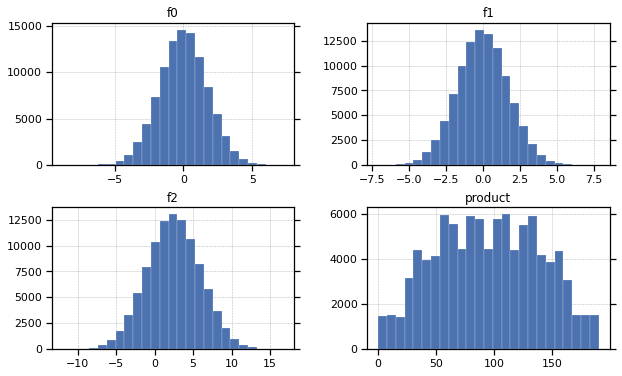

In [17]:
data2.hist(bins=25)

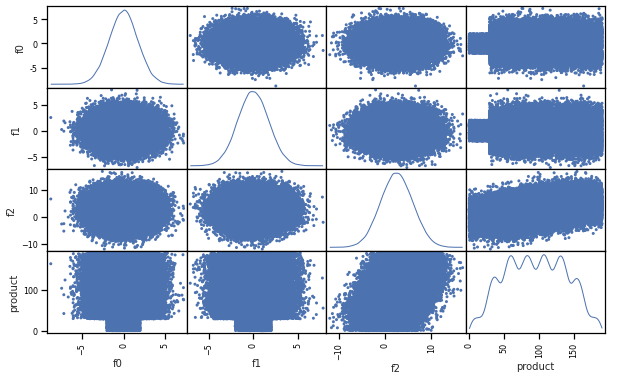

In [18]:
matrix = pd.plotting.scatter_matrix(data2, diagonal = "kde",  alpha = 1)
for ax in matrix.ravel():
    ax.set_xlabel(ax.get_xlabel(), fontsize = 10, rotation = 0)
    ax.set_ylabel(ax.get_ylabel(), fontsize = 10, rotation = 90)
    ax.grid(False)

In [19]:
#phik_help(data2)

Корреляция параметров между собой


<AxesSubplot:>

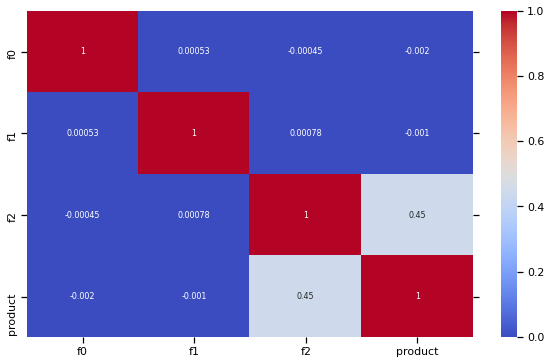

In [20]:
print("Корреляция параметров между собой")
se.heatmap(data2.corr(), cmap='coolwarm', annot=True, annot_kws={"size": 8})

**Данные:**

id — уникальный идентификатор скважины;  
f0, f1, f2 — три признака точек (неважно, что они означают, но сами признаки значимы);  
product — объём запасов в скважине (тыс. баррелей).

### Дубликаты

In [21]:
#Количество дубликатов по строкам и в столбце id для 1ого региона
print(data0.duplicated().sum())
print(data0['id'].duplicated().sum())

0
10


In [22]:
#Количество дубликатов по строкам и в столбце id для 2ого региона
print(data1.duplicated().sum())
print(data1['id'].duplicated().sum())

0
4


In [23]:
#Количество дубликатов по строкам и в столбце id для 3его региона
print(data2.duplicated().sum())
print(data2['id'].duplicated().sum())

0
4


In [24]:
data1[data1['id'].duplicated()]

,id,f0,f1,f2,product
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625
82178,bfPNe,-6.202799,-4.820045,2.995107,84.038886
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305
84461,5ltQ6,18.213839,2.191999,3.993869,107.813044


In [25]:
data1.query('id == "LHZR0"')

,id,f0,f1,f2,product
1305,LHZR0,11.170835,-1.945066,3.002872,80.859783
41906,LHZR0,-8.989672,-4.286607,2.009139,57.085625


In [26]:
data1.query('id == "wt4Uk"')

,id,f0,f1,f2,product
47591,wt4Uk,-9.091098,-8.109279,-0.002314,3.179103
82873,wt4Uk,10.259972,-9.376355,4.994297,134.766305


**Вывод**  

Данные чистые, пропусков нет, дополнительная предобработка не требуется. Хочется отметить, что данные все очень разные и распределены неодинаково во всех регионах, и даже вышдядит немного странно. Выбивается второй регион, данные там распредлелены почти дискретно. В третьем регионе параметры f0 и f1 имеют какое-то ограничение для product < 40. C корреляцией параметров вообще что-то дикое твориться, параметр f2 очень сильно коорелирует с целевым параметров product, для второго региона она состовляет 1, что очень много. Также некоторые "уникальные" идентификаторы скважины повторяются, причем значения для них совершенно разные. Также корреляция фика показывает очень сильную зависиомть между столбцом id и product для первого и второго региона, а это вдвойне странно. 

Предворительно можно сказать, что для второго региона модель построиться без капризов, а вот с остальными будет сложнее. 

### Подготови данные

**Условия задачи:**  
1) Для обучения модели подходит только **линейная регрессия** (остальные — недостаточно предсказуемые).  
2) При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки.  
3) Бюджет на разработку скважин в регионе — 10 млрд рублей.  
4) При нынешних ценах один баррель сырья приносит 450 рублей дохода. Доход с каждой единицы продукта составляет 450 тыс. рублей, поскольку объём указан в тысячах баррелей.  
5) После оценки рисков нужно оставить лишь те регионы, в которых вероятность убытков меньше 2.5%. Среди них выбирают регион с наибольшей средней прибылью.  

Разобьём данные на тренировочную и валидационную выборки.

In [27]:
def features_target(data):
    features = data.drop(columns=['product', 'id'])
    target = data['product']
    features_train, features_valid, target_train, target_valid = train_test_split(
                    features, target, test_size=0.25, random_state=42)
    return features_train, features_valid, target_train, target_valid

In [28]:
region_1_features_train, region_1_features_valid, region_1_target_train, region_1_target_valid = features_target(data0)
region_2_features_train, region_2_features_valid, region_2_target_train, region_2_target_valid = features_target(data1)
region_3_features_train, region_3_features_valid, region_3_target_train, region_3_target_valid = features_target(data2)

## Обучение и проверка модели

In [29]:
model = LinearRegression()
model.fit(region_1_features_train, region_1_target_train)
pred_region_1 = pd.Series(model.predict(region_1_features_valid), index=region_1_features_valid.index)
mean_pred_region_1 = np.mean(pred_region_1)
print(f"RMSE = {mean_squared_error(region_1_target_valid, pred_region_1)**0.5};  Mean = {mean_pred_region_1}")

RMSE = 37.75660035026169;  Mean = 92.39879990657768


In [30]:
model = LinearRegression()
model.fit(region_2_features_train, region_2_target_train)
pred_region_2 = pd.Series(model.predict(region_2_features_valid), index=region_2_features_valid.index)
mean_pred_region_2 = np.mean(pred_region_2)
print(f"RMSE = {mean_squared_error(region_2_target_valid, pred_region_2)**0.5};  Mean = {mean_pred_region_2}")

RMSE = 0.890280100102884;  Mean = 68.71287803913762


In [31]:
model = LinearRegression()
model.fit(region_3_features_train, region_3_target_train)
pred_region_3 = pd.Series(model.predict(region_3_features_valid), index=region_3_features_valid.index)
mean_pred_region_3 = np.mean(pred_region_3)
print(f"RMSE = {mean_squared_error(region_3_target_valid, pred_region_3)**0.5};  Mean = {mean_pred_region_3}")

RMSE = 40.145872311342174;  Mean = 94.77102387765939


**Вывод**  

Для второго региона модель работает хорошо, ошибка очень маленькая. Для остальных регионов ошибка слишком большая. К сожалению мы ограничены условиями задачи и другие модели использовать не можем. 

## Подготовка к расчёту прибыли

In [32]:
START_UP_CAPITAL = 10E9
PRICE_OF_ONE_KiloBrrel = 450000
MIN_NUMBER_OF_WELLS = int(START_UP_CAPITAL/PRICE_OF_ONE_KiloBrrel)

In [33]:
print("Эквивалент начальному вложению в единицах продукта -", MIN_NUMBER_OF_WELLS )

Эквивалент начальному вложению в единицах продукта - 22222


In [34]:
print("Необходимое количество продукта в каждой скважине -", MIN_NUMBER_OF_WELLS/200)

Необходимое количество продукта в каждой скважине - 111.11


In [35]:
print(f"Запас в регионе 1 равен {int(data0['product'].sum())}")
print(f"Запас в регионе 2 равен {int(data1['product'].sum())}")
print(f"Запас в регионе 3 равен {int(data2['product'].sum())}")

Запас в регионе 1 равен 9250000
Запас в регионе 2 равен 6882500
Запас в регионе 3 равен 9500000


In [36]:
print(f"Средний запас в регионе 1 одной скважины равен {int(data0['product'].mean())}")
print(f"Средний запас в регионе 2 одной скважины равен {int(data1['product'].mean())}")
print(f"Средний запас в регионе 3 одной скважины равен {int(data2['product'].mean())}")

Средний запас в регионе 1 одной скважины равен 92
Средний запас в регионе 2 одной скважины равен 68
Средний запас в регионе 3 одной скважины равен 95


In [37]:
print(f"Необходимое количество скважен в 1 регионе {int(MIN_NUMBER_OF_WELLS/int(data0['product'].mean()))}")
print(f"Необходимое количество скважен в 1 регионе {int(MIN_NUMBER_OF_WELLS/int(data1['product'].mean()))}")
print(f"Необходимое количество скважен в 1 регионе {int(MIN_NUMBER_OF_WELLS/int(data2['product'].mean()))}")

Необходимое количество скважен в 1 регионе 241
Необходимое количество скважен в 1 регионе 326
Необходимое количество скважен в 1 регионе 233


**Вывод**  

Итак, мы получили, что для того чтобы окупиться нам необходимо 22222 количество продукта, при этом мы может сделать только 200 скажин, поэтому в каждой скажине должно быть 111 количество продукта (Значения все средние, поэтому это не минимальное значение, а среднее). Видно, что это значение сильно отличается от средних значением в регионах, особенно 2ой регион, отличие почти в 2 раза. Конечно мы будем выбирать точки с макисамльнимы запасам, поэтому ситуация может улучшиться и мы уложимся в 200 точек. 

## Расчёт прибыли и рисков 

Напишите функцию для расчёта прибыли по выбранным скважинам и предсказаниям модели:  
4.1. Выберите скважины с максимальными значениями предсказаний.  
4.2. Просуммируйте *целевое значение* объёма сырья, соответствующее этим предсказаниям.  
4.3. Рассчитайте прибыль для полученного объёма сырья.  

Посчитайте риски и прибыль для каждого региона:  
5.1. Примените технику Bootstrap с 1000 выборок, чтобы найти распределение прибыли.  
5.2. Найдите среднюю прибыль, 95%-й доверительный интервал и риск убытков. Убыток — это отрицательная прибыль.  
5.3. Напишите выводы: предложите регион для разработки скважин и обоснуйте выбор.  

In [38]:
#Функция для рассчёта прибыли
def profit(pred, target):
    #лучшие из предсказанных
    pred = pred.sample(500, replace=True,  random_state = state).sort_values(ascending=False)[:200]
    #Количесвто продукта в 200 точках
    sum_product = int(target[pred.index].sum())
    #Прибыль
    profit = sum_product*PRICE_OF_ONE_KiloBrrel-START_UP_CAPITAL
    return profit

При разведке региона исследуют 500 точек, из которых с помощью машинного обучения выбирают 200 лучших для разработки. Эти 500 точек будем выбирать из валидационной выорки, чтобы честно использовать результаты модели. Далее, отсортируем предсказания для них и возьмем 200 лучших. 

In [39]:
state = np.random.RandomState(42)

In [40]:
#Регион 1
values = []
count_loss = 0
for i in range(1000):
    prof = profit(pred_region_1, region_1_target_valid)   
    values.append(prof)
    if prof < 0:
        count_loss +=1
        
values = pd.Series(values)
print("Вероятность убытков", round(count_loss/1000*100, 3), '%')
print("Среднее значение:", values.mean())

lower = values.quantile(0.025)
upper = values.quantile(0.975)
print("95%-й доверительный интервал:", lower, upper)

print("Прибыль:", values.mean())

Вероятность убытков 6.1 %
Среднее значение: 399349250.0
95%-й доверительный интервал: -110484999.99999999 897323749.9999999
Прибыль: 399349250.0


In [41]:
#Регион 2
values = []
count_loss = 0
for i in range(1000):
    prof = profit(pred_region_2, region_2_target_valid)   
    values.append(prof)
    if prof < 0:
        count_loss +=1
        
values = pd.Series(values)
print("Вероятность убытков", round(count_loss/1000*100, 3), '%')
print("Среднее значение:", values.mean())

lower = values.quantile(0.05)
upper = values.quantile(0.95)
print("95%-й доверительный интервал")
print("Нижний:", lower)
print("Верхний:", upper)

print("Прибыль:", values.mean())

Вероятность убытков 0.9 %
Среднее значение: 452353850.0
95%-й доверительный интервал
Нижний: 109857500.00000001
Верхний: 785667499.9999999
Прибыль: 452353850.0


In [42]:
#Регион 3
values = []
count_loss = 0
for i in range(1000):
    prof = profit(pred_region_3, region_3_target_valid)   
    values.append(prof)
    if prof < 0:
        count_loss +=1
        
values = pd.Series(values)
print("Вероятность убытков", round(count_loss/1000*100, 3), '%')
print("Среднее значение:", values.mean())

lower = values.quantile(0.05)
upper = values.quantile(0.95)
print("95%-й доверительный интервал:", lower, upper)

print("Прибыль:", values.mean())

Вероятность убытков 7.5 %
Среднее значение: 378485000.0
95%-й доверительный интервал: -66767499.99999999 819934999.9999999
Прибыль: 378485000.0


**Вывод**  

Уже на стадии модели видно, что второй регион сильно выделяется на фоне других. Он имеет наименьшую вероятность убытков (около 1%) и наибольшее среднее значение прибыли (450млн руб). Если бы я был нефтяным магнатом, то выбрал бы этот регион. 